In [1]:
import numpy as np
import pandas as pd

In [2]:
baseline_users = [f"U{i:02d}" for i in range(1, 42, 2)]
experiment_users = [f"U{i:02d}" for i in range(2, 43, 2)]

In [3]:
baseline_time_df = pd.DataFrame(columns=baseline_users, index=range(104))
baseline_time_df_stats = pd.DataFrame(columns=["user", "sum", "mean", "std", "min", "max", "50%"], index=baseline_users)
for user in baseline_users:
    baseline_time_df_stats.loc[user, "user"] = user
    time_df = pd.read_csv(f"time/log_time/{user}_time.csv").iloc[-104:].reset_index(drop=True)
    baseline_time_df[user] = time_df["duration_in_seconds"]
    baseline_time_df_stats.loc[user, "sum"] = time_df["duration_in_seconds"].sum()
    baseline_time_df_stats.loc[user, ["mean", "std", "min", "max", "50%"]] = time_df.describe().loc[["mean", "std", "min", "max", "50%"]].T.values
baseline_time_df_stats

,user,sum,mean,std,min,max,50%
U01,U01,1941.39,18.667212,16.565987,5.17,80.3,13.015
U03,U03,1238.441,11.908087,6.364071,3.975,47.376,9.5095
U05,U05,1075.399,10.340375,5.733853,4.312,47.692,8.27
U07,U07,1197.955,11.518798,10.499443,1.714,52.929,8.0055
U09,U09,1728.58,16.620962,6.709607,9.725,44.313,15.0015
U11,U11,1087.536,10.457077,3.672591,4.328,25.033,9.249
U13,U13,844.034,8.115712,1.718815,5.483,18.38,8.071
U15,U15,994.212,9.559731,4.405629,2.61,28.584,7.959
U17,U17,1278.415,12.292452,5.464295,6.351,30.953,10.8485
U19,U19,1555.689,14.958548,7.82778,7.165,42.105,11.6415


<Axes: title={'center': 'Baseline Time Distribution'}, ylabel='Frequency'>

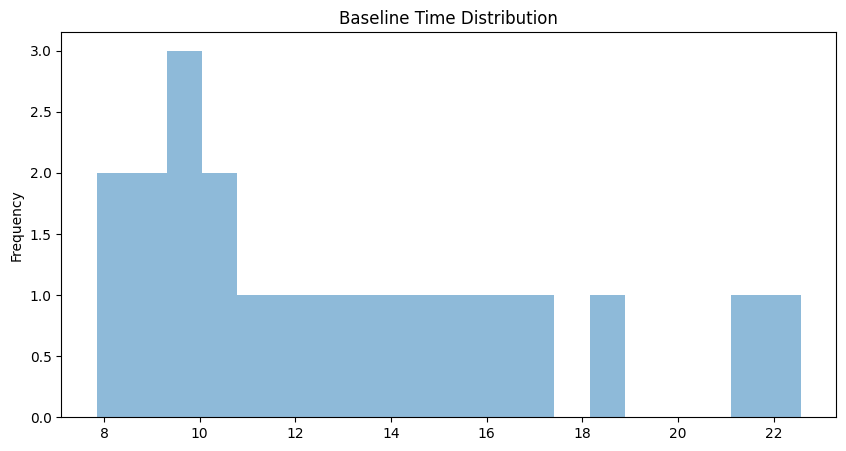

In [4]:
baseline_time_df_stats["mean"].plot.hist(bins=20, alpha=0.5, figsize=(10, 5), title="Baseline Time Distribution")

In [5]:
baseline_time_df.to_csv("time/baseline_time.csv", index=False)
baseline_time_df_stats.to_csv("time/baseline_time_stats.csv", index=False)

In [6]:
experiment_time_df = pd.DataFrame(columns=experiment_users, index=range(104))
experiment_time_df_stats = pd.DataFrame(columns=["user", "sum", "mean", "std", "min", "max", "50%"], index=experiment_users)
for user in experiment_users:
    experiment_time_df_stats.loc[user, "user"] = user
    time_df = pd.read_csv(f"time/log_time/{user}_time.csv").iloc[-104:].reset_index(drop=True)
    experiment_time_df[user] = time_df["duration_in_seconds"]
    experiment_time_df_stats.loc[user, "sum"] = time_df["duration_in_seconds"].sum()
    experiment_time_df_stats.loc[user, ["mean", "std", "min", "max", "50%"]] = time_df.describe().loc[["mean", "std", "min", "max", "50%"]].T.values
experiment_time_df_stats

,user,sum,mean,std,min,max,50%
U02,U02,2049.689,19.708548,10.838588,8.132,88.613,16.79
U04,U04,1720.489,16.543163,16.101112,2.002,108.897,9.9735
U06,U06,3312.681,31.852702,24.749257,3.21,146.254,25.3755
U08,U08,1771.158,17.030365,18.194265,3.043,87.797,8.313
U10,U10,1228.818,11.815558,8.781671,0.611,57.238,9.6155
U12,U12,1330.309,12.791433,11.035037,0.77,74.007,9.5495
U14,U14,2539.112,24.414538,22.940449,0.506,183.906,17.542
U16,U16,1808.12,17.385769,11.426251,0.981,108.628,14.521
U18,U18,2638.246,25.36775,24.604104,7.776,155.972,15.8275
U20,U20,1271.711,12.22799,7.000725,0.707,45.375,10.782


<Axes: title={'center': 'Experiment Time Distribution'}, ylabel='Frequency'>

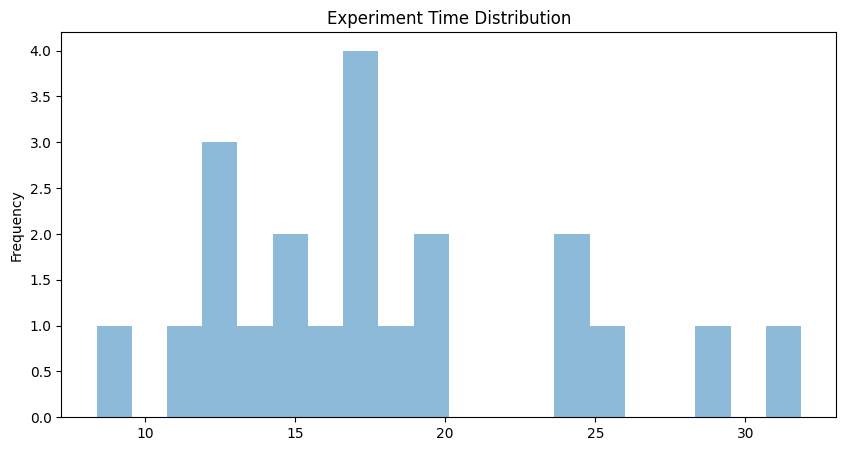

In [7]:
experiment_time_df_stats["mean"].plot.hist(bins=20, alpha=0.5, figsize=(10, 5), title="Experiment Time Distribution")

In [8]:
experiment_time_df.to_csv("time/experiment_time.csv", index=False)
experiment_time_df_stats.to_csv("time/experiment_time_stats.csv", index=False)

In [9]:
baseline_learning_curve = pd.DataFrame(columns=["annotation time in seconds", "group"], index=range(104))
baseline_learning_curve.loc[:, "annotation time in seconds"] = baseline_time_df.T.mean()
baseline_learning_curve.loc[:, "group"] = "baseline"

experiment_learning_curve = pd.DataFrame(columns=["annotation time in seconds", "group"], index=range(104))
experiment_learning_curve.loc[:, "annotation time in seconds"] = experiment_time_df.T.mean()
experiment_learning_curve.loc[:, "group"] = "experiment"
time_df = pd.DataFrame([baseline_time_df.T.mean(), experiment_time_df.T.mean()], index=["baseline", "experiment"]).T
time_df['trajectory pair'] = time_df.index + 1

In [10]:
baseline_time_df.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,19.226000,17.338476,21.206000,17.854619,13.237714,19.941571,18.976000,16.572476,17.311905,12.963381,...,9.940095,11.005476,9.963381,10.414952,11.948905,12.461238,8.973619,13.321429,9.907095,9.403238
std,17.111275,7.327124,15.879381,11.344770,6.562181,10.692867,18.267395,8.464766,13.539255,6.054222,...,4.077586,7.636556,5.210483,5.554622,8.385401,12.254593,6.532610,11.877232,6.457686,6.181986
min,8.010000,0.684000,6.557000,2.790000,5.599000,5.879000,5.880000,6.358000,6.436000,5.319000,...,2.606000,2.203000,3.899000,1.917000,2.152000,1.714000,2.068000,5.746000,2.345000,1.872000
25%,8.484000,12.255000,10.498000,8.652000,7.694000,10.169000,8.281000,8.783000,8.269000,8.717000,...,7.584000,7.341000,7.216000,7.578000,7.317000,7.945000,6.522000,7.578000,6.410000,6.599000
50%,12.647000,18.985000,17.539000,13.625000,11.830000,19.552000,9.411000,14.898000,11.255000,11.621000,...,9.018000,8.252000,9.160000,8.923000,9.378000,9.031000,7.313000,9.907000,7.825000,7.865000
75%,24.809000,19.955000,22.831000,24.970000,17.169000,28.584000,22.420000,20.643000,21.835000,15.393000,...,12.310000,12.124000,9.918000,13.163000,12.235000,13.114000,8.602000,13.354000,10.379000,9.566000
max,80.300000,29.270000,72.761000,43.572000,30.435000,41.945000,74.000000,35.160000,55.260000,27.856000,...,18.537000,37.984000,29.210000,28.524000,40.734000,61.458000,30.308000,61.149000,28.894000,26.140000


In [11]:
from matplotlib import pyplot

In [12]:
import statsmodels.api as sm

In [13]:
# model = sm.formula.ols(formula='baseline ~ index', data=time_df)
# res = model.fit()

In [14]:
# fig, ax = pyplot.subplots()
# time_df[["baseline", "experiment"]].plot.line(figsize=(15, 5), title="Learning Curve", xlabel="User", ylabel="Annotation Time in Seconds", ax=ax)
# time_df.assign(fit=res.fittedvalues).plot(x='trajectory pair', y='fit', ax=ax)

In [15]:
baseline_time_df["trajectory pair"] = baseline_time_df.index + 1
baseline_learning_curve = pd.melt(baseline_time_df, id_vars=["trajectory pair"], value_vars=baseline_users, var_name="user_baseline", value_name="baseline")
baseline_learning_curve

,trajectory pair,user_baseline,baseline
0,1,U01,80.300
1,2,U01,9.500
2,3,U01,22.360
3,4,U01,20.540
4,5,U01,14.440
...,...,...,...
2179,100,U41,10.337
2180,101,U41,2.678
2181,102,U41,22.979
2182,103,U41,28.894


In [16]:
experiment_time_df["trajectory pair"] = experiment_time_df.index + 1
experiment_learning_curve = pd.melt(experiment_time_df, id_vars=["trajectory pair"], value_vars=experiment_users, var_name="user_experiment", value_name="experiment")
experiment_learning_curve

,trajectory pair,user_experiment,experiment
0,1,U02,88.613
1,2,U02,74.821
2,3,U02,22.017
3,4,U02,30.593
4,5,U02,29.410
...,...,...,...
2179,100,U42,6.683
2180,101,U42,8.478
2181,102,U42,23.850
2182,103,U42,11.383


In [17]:
# df = baseline_learning_curve.merge(experiment_learning_curve, on="index", how="outer")
# df

In [18]:
# import plotly.express as px

# fig = px.scatter(df, x="index", y=["baseline", "experiment"], trendline="lowess")
# fig.show()

In [19]:
# import plotly.express as px

# fig = px.scatter(time_df, x="trajectory pair", y=["baseline", "experiment"], trendline="lowess", trendline_options=dict(frac=0.3))
# fig.show()

In [20]:
import statsmodels.api as sm

time_df["baseline_lowess"] = sm.nonparametric.lowess(time_df["baseline"], time_df["trajectory pair"], frac=0.3)[:, 1]
time_df["experiment_lowess"] = sm.nonparametric.lowess(time_df["experiment"], time_df["trajectory pair"], frac=0.3)[:, 1]
time_df_melted = pd.melt(time_df, id_vars=["trajectory pair"], value_vars=["baseline", "experiment"], var_name="group", value_name="annotation time in seconds")
time_df_melted[["trajectory pair", "group", "lowess"]] = pd.melt(time_df, id_vars=["trajectory pair"], value_vars=["baseline_lowess", "experiment_lowess"], var_name="group", value_name="lowess")[["trajectory pair", "group", "lowess"]]
time_df_melted["group"] = time_df_melted["group"].str.replace("experiment", "FARPLS")
time_df_melted["group_lowess"] = time_df_melted["group"].str.replace("_lowess", " trendline")
time_df_melted["group"] = time_df_melted["group"].str.replace("_lowess", "")

In [21]:
time_df_melted

,trajectory pair,group,annotation time in seconds,lowess,group_lowess
0,1,baseline,19.226000,18.889835,baseline trendline
1,2,baseline,17.338476,18.552373,baseline trendline
2,3,baseline,21.206000,18.217653,baseline trendline
3,4,baseline,17.854619,17.886143,baseline trendline
4,5,baseline,13.237714,17.558029,baseline trendline
...,...,...,...,...,...
203,100,FARPLS,17.858095,15.966901,FARPLS trendline
204,101,FARPLS,14.553952,16.044905,FARPLS trendline
205,102,FARPLS,22.599143,16.121839,FARPLS trendline
206,103,FARPLS,13.869143,16.197336,FARPLS trendline


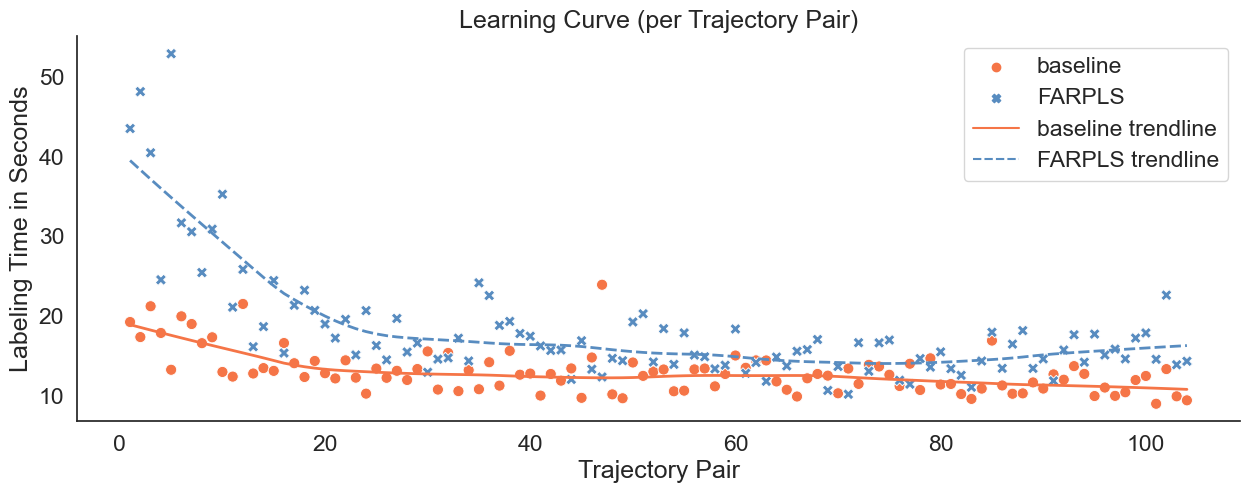

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white", font_scale=1.5)
color_palette = sns.color_palette("RdYlBu", 13)[2:13:9]
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(data=time_df_melted, x="trajectory pair", y="annotation time in seconds", hue="group", style="group", ax=ax, palette=color_palette, s=64)
sns.lineplot(data=time_df_melted, x="trajectory pair", y="lowess", hue="group_lowess", style="group_lowess", ax=ax, palette=color_palette, linewidth=2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.set_title("Learning Curve (per Trajectory Pair)")
ax.set_xlabel("Trajectory Pair")
ax.set_ylabel("Labeling Time in Seconds")
ax.legend()
fig.savefig("time/learning_curve.pdf", bbox_inches='tight')